<a href="https://colab.research.google.com/github/audrb1999/ML-DL-Study/blob/main/%EC%8B%AC%EC%B8%B5%20%EC%8B%A0%EA%B2%BD%EB%A7%9D%20%EC%84%B1%EB%8A%A5%20%ED%96%A5%EC%83%81%EC%8B%9C%ED%82%A4%EA%B8%B0/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D%20%EC%96%B4%ED%94%8C%EB%A6%AC%EC%BC%80%EC%9D%B4%EC%85%98%20%EC%84%A4%EC%A0%95%ED%95%98%EA%B8%B0/18.%EC%A7%80%EC%88%98_%EA%B0%80%EC%A4%91_%EC%9D%B4%EB%8F%99%ED%8F%89%EA%B7%A0_%EC%9D%B4%ED%95%B4%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 지수 가중 이동평균 이해하기

지구 가중 평균을 구현하는데 중요한 공식

$V_{[t]} = \beta * V_{[t-1]} + (1 - \beta)\theta_{[t]}$

>vt  는 t 번째 데이터의 가중 지수가중이동평균입니다.

일일 기온의 평균을 계산하는 방법에 대해 수학적으로 더 알아봅시다

$V_{[100]} = 0.1\theta_{[100]} +  0.9 V_{[99]} $ 

$0.9 V_{[99]} =0.9 (0.1\theta_{[99]} +  0.9 V_{[98]}) $  
  

이렇게 계속 연결되어 있습니다.


이것을 좀 더 풀어보면

$0.1\theta_{[100]} +  0.9 * 0.1 * V \theta_{[99]} + 0.9^2 * 0.1 * V \theta_{[98]} + 0.9^3 * 0.1 * V \theta_{[97]}$

이렇게 됩니다.

0.1에서 시작해 0.1 * 0.9의 제곱을 계속해 지수적으로 감소하는 것들을 전부 더하는 함수입니다.

앞에 있는 0.1,  0.1 * 0.9 계수 값들을 전부 더하면 1또는 1에 가까운 값이 되는데 이것이 편향 보정이라고 불리는 값이다.

이 값들에 의해 지수 가중 평균이 됩니다.

만약 $\beta$(가중치)가 0.9 라면 10일 뒤 0.35의 값으로 대략 1/3로 변화게 됩니다.


코드로 표현할 때 

처음에 $V_{\theta} = 0$로 표현하고 이것을 for문돌리면서 값을 갱신해주면 됨

$V$가 $\theta$ 매개변수로 하는 지수 가중 평균을 계산한다는 것을 나타내는 것!

for문을 사용해 이전 내용을 갱신하는 방법을 쓴다면 변수를 한 개만 쓰기에 적게듬

이 방법이 효율적이라서 머신러닝에서 자주 씀!




요약

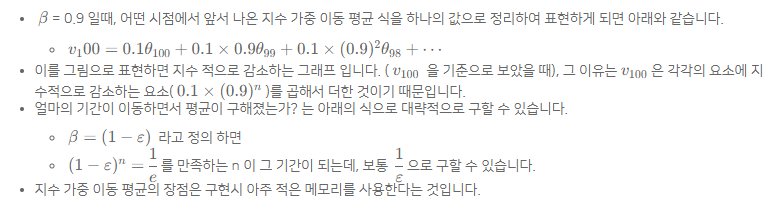

# 지수 가중 이동 평균의 편향보정

편향보정으로 평균을 더 정확하게 계산할 수 있다.

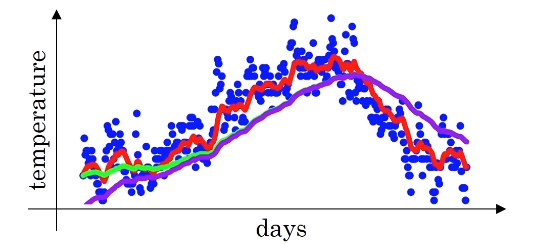

이전에 우리가 $V_{[t]} = \beta * V_{[t-1]} + (1 - \beta)\theta_{[t]}$ 공식에서 $\beta$값이 0.98이면 초록색 선을 따라간다고 했는데

사실 계산해보면 보라색 곡선을 따라갑니다.

보라색 곡선은 매우 낮은 곳(0에 가까운 곳)에서 시작합니다.

이것을 고쳐보겠습니다!

이동 평균을 구할 때 $V^{[0]}$은 0으로 초기화합니다.

$V_{[0]}$ = 0

$V_{[1]} =$ ~~0.98 * V0~~(0) +  $ 0.02 * \theta_{[1]}$
> 값이 너무 낮아 첫 번째 날의 온도를 잘 추정할 수 없음


$V_{[2]} = 0.98 * V_{[1]} + 0.02 * \theta_{[2]} = $

$0.98*  0.02 * \theta_{[1]} + 0.02 * \theta_{[2]}$

세타1, 2가 양수라고 하면 $V_{[2]}$를 계산한 값은 세타 값들 보다 더 작아집니다.

한 해의 첫 두 날들를 추정하는 값이 엉망이 되어버립니다.

> 초기 값들이 너무 작아지는 현상을 막자

초반 부분에서 

$V_{[t]}$를 취하지말고 $\frac {V_{[t]}} {{1 - \beta}_t}$ 를 취합니다. 

> t는 현재의 온도입니다.

t = 2일 때

$1 - \beta^2 = 1 - (0.98)^2 = 0.0396$

즉 $V^{[t]}$를 0.0396으로 나눈 값을 사용하는 것입니다.


- 이것이 $ \theta_{[2]}$, $ \theta_{[2]}$의 가중평균에 편향을 없앤 값입니다.

여기서 t값이 커질수록 이 연산을 하는 의미가 사라집니다.

편향 보정은 초반 값들에 대해서 더 나은 온도의 추정값을 얻을 수 있도록 도와줍니다!

이렇게하면 초록색 곡선에 가까워짐!

하지만 편향 보정은 거의 구현하지 않습니다. 

초기부분을 지나가버리고 그 다음 부분부터 사용하면 되기 때문입니다.

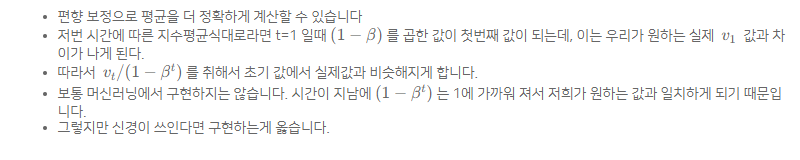